In [92]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [93]:
from pandas_datareader import data as pdr
import fix_yahoo_finance

# Cette fois, on load les data depuis yahoo finance (via pandas_datareader)
start = datetime(2016,1,1)
end = datetime(2019,8,21)
#end = dt.datetime.now()

ticker = web.DataReader('AAPL', 'yahoo', start, end)
ticker.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,105.370003,102.000000,102.610001,105.349998,67649400.0,98.742249
2016-01-05,105.849998,102.410004,105.750000,102.709999,55791000.0,96.267815
2016-01-06,102.370003,99.870003,100.559998,100.699997,68457400.0,94.383888
2016-01-07,100.129997,96.430000,98.680000,96.449997,81094400.0,90.400467
2016-01-08,99.110001,96.760002,98.550003,96.959999,70798000.0,90.878479


In [94]:
# On récupère les "adjusted closing prices"
adj_close = ticker["Adj Close"]

# on rajoute 2 colonnes: moyennes mobiles sur 7 et 30 jours
# on utlise la fonction rolling(window = k).mean()
ticker["rolling means (20)"] = adj_close.rolling(window = 20).mean()
ticker["rolling means (50)"] = adj_close.rolling(window = 50).mean()
ticker["diff_rm"] = ticker["rolling means (20)"] - ticker["rolling means (50)"]
delta_t = 0.1
ticker["rolling means (20) slope"] = ( ticker["rolling means (20)"] - ticker["rolling means (20)"].shift(3) ) / delta_t
ticker["rolling means (50) slope"] = ( ticker["rolling means (50)"] - ticker["rolling means (50)"].shift(3) ) / delta_t

# si on inspecte aapl_yahoo.head(), on remarque que les moyennes ne commencent pas tout de suite
ticker.tail()

,High,Low,Open,Close,Volume,Adj Close,rolling means (20),rolling means (50),diff_rm,rolling means (20) slope,rolling means (50) slope
Date,,,,,,,,,,,
2019-08-15,205.139999,199.669998,203.460007,201.740005,27227400.0,201.740005,204.105815,200.492362,3.613453,1.136093,16.001370
2019-08-16,207.160004,203.839996,204.279999,206.500000,27620400.0,206.500000,204.339656,200.931983,3.407673,0.852478,13.132391
2019-08-19,212.729996,210.029999,210.619995,210.350006,24413600.0,210.350006,204.535374,201.350378,3.184996,2.724808,12.558350
2019-08-20,213.350006,210.320007,210.880005,210.360001,26884300.0,210.360001,204.650898,201.720556,2.930342,5.450829,12.281946
2019-08-21,213.649994,211.600006,212.990005,212.639999,21535400.0,212.639999,204.888889,202.091904,2.796986,5.492332,11.599207


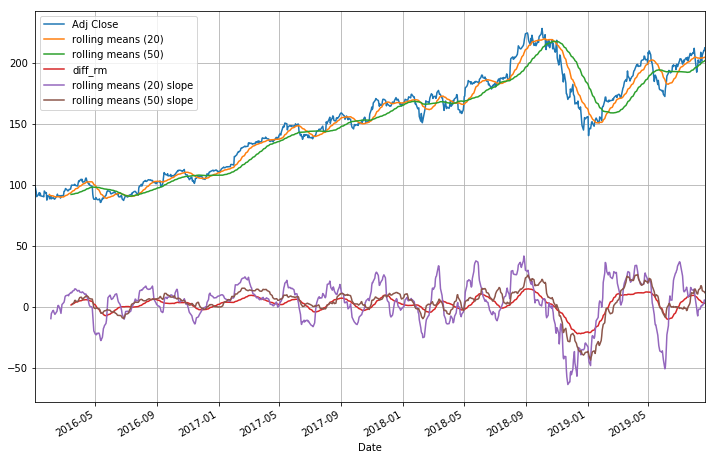

In [95]:
# graphe
ticker[["Adj Close", "rolling means (20)", "rolling means (50)", "diff_rm", "rolling means (20) slope", "rolling means (50) slope"]].plot(grid = True, figsize = (12, 8))
plt.show()

In [100]:
def stats(ticker, start = datetime.today() - timedelta(days=100), end = datetime.today(), short = 20, long = 50):
    ticker = web.DataReader(ticker, "yahoo", start, end)
    adj_close = ticker["Adj Close"]
    ticker["rolling means (20)"] = adj_close.rolling(window = short).mean()
    ticker["rolling means (50)"] = adj_close.rolling(window = long).mean()
    ticker["diff_mb"] = ticker["rolling means (20)"] - ticker["rolling means (50)"]
    delta_t = 0.1
    ticker["rolling means (20) slope"] = ( ticker["rolling means (20)"] - ticker["rolling means (20)"].shift(3) ) / delta_t
    ticker["rolling means (50) slope"] = ( ticker["rolling means (50)"] - ticker["rolling means (50)"].shift(3) ) / delta_t
    return ( ticker["diff_mb"][-1] , ticker["rolling means (20) slope"][-1] , ticker["rolling means (50) slope"][-1] )

In [101]:
stats("AAPL")

(2.7280645751953045, 6.646949768066293, 11.21626281738287)

In [102]:
tickers_list = pd.read_csv("sp500.csv")
tickers = tickers_list["Symbol"]
print(tickers.head())
tickers = list(tickers)
print(len(tickers))
#tickers

0     MMM
1     AOS
2     ABT
3    ABBV
4     ACN
Name: Symbol, dtype: object
505


In [103]:
for x in tickers:
    try:
        stats(x)
        if (stats(x)[1] >= 0.0 and stats(x)[2] >= 0.0) or (stats(x)[1] <= 0.0 and stats(x)[2] <= 0.0):
            print(x, stats(x))
    except KeyError:
        pass

MMM (-3.6400723266601744, -23.589157104492244, -3.7159973144531477)
AOS (0.07443824768066065, 2.6236114501952557, 1.2484405517578523)
ABBV (-3.532895088195801, -0.1900024414061363, -5.742010498046852)
ACN (1.8048986816406227, 1.1849899291993893, 6.773999023437511)
ATVI (0.7858000946044896, 3.475002288818345, 1.824000549316409)
AYI (-2.480143661499028, -14.544998168945256, -5.413735961914199)
AAP (-7.473047790527346, -28.52999877929676, -9.388397216796989)
AMD (-0.23920007705688562, -3.475000381469755, -0.7000000000000028)
AES (-0.5813928413391114, -2.247856140136708, -0.6928035736083871)
AMG (-5.3158007812500045, -20.871288299560575, -8.039736938476523)
AFL (-1.9644431686401305, -5.847597122192383, -2.3171516418457117)
A (-1.706496658325193, 2.869998931884794, 0.970539855957071)
AKAM (3.6177001953125085, 7.460006713867244, 5.1860000610351165)
ALK (-0.763909378051757, -6.876003265380817, -0.3305152893066321)
ALB (-2.016700515747061, -15.709999084472628, -4.427499389648517)
ALXN (-7.6079

ChunkedEncodingError: ('Connection broken: IncompleteRead(4202 bytes read, 1942 more expected)', IncompleteRead(4202 bytes read, 1942 more expected))